# Prob No2 - Funding choice

In [3]:
import pandas as pd
import numpy as np
import random 
from scipy import linalg
import math
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
dataset = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/R/datasett_bus_surv_no2.csv"
folderFig = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/Artikkel"

In [5]:
df = pd.read_csv(dataset, sep=",", engine='python')


In [8]:
# df.drop(['navn', 'orgnr_foretak', 'f_postnr', 'sn07_1'], axis=1, inplace=True)
df['orgnr'] = df['orgnr']-random.randint(1,1000)
df['orgnr_foretak'] = df['orgnr_foretak']-random.randint(1,1000)
df['employ'] = df['employ']+random.randint(1,15)
df.head()


,orgnr,orgnr_foretak,sector,bof_nace07,inves_fou,inves_fou_sale,inves_facilities,inves_facilities_sale,inves_plot,inves_plot_sale,...,cashlimit,cashlimit1,equityFunding,debtFunding,signHurdle,sensitivity,hurdleRate,uncertainCash,_est_no21,_est_no22
0,811280334,811280338,2100.0,16.232000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,1
1,812749544,812749548,2100.0,16.100000,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,1,0,1,1
2,816063594,816063598,2100.0,21.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,0,1,1,1,1
3,829094074,829094078,2100.0,23.610001,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,1
4,832008824,832008828,2100.0,30.120001,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,1


In [6]:
df.drop(['navn1'], axis=1, inplace=True)

In [7]:
# beta1 = pd.Series([3,1])
# X = df[['cap','mach_build_share']]
# X.dot(beta1)
# # beta1.dot(X)
# # beta11 = pd.DataFrame([[3,2]])
df.columns


Index(['orgnr', 'orgnr_foretak', 'sector', 'bof_nace07', 'inves_fou',
       'inves_fou_sale', 'inves_facilities', 'inves_facilities_sale',
       'inves_plot', 'inves_plot_sale',
       ...
       'cashlimit', 'cashlimit1', 'equityFunding', 'debtFunding', 'signHurdle',
       'sensitivity', 'hurdleRate', 'uncertainCash', '_est_no21', '_est_no22'],
      dtype='object', length=192)

In [8]:
# list of explanatory variables, important to stack the variables and estimated parametes in the same order
explanatoryNo2 = ['medcap' ,'largecap' ,'debt_asset','profitratio', 'utbytte','cashlimit1']
# make a new df
df_short2 = df.copy(deep=True)
# df_short = df_short.drop(explantory, axis=
# convert to np.array (use df.to_numpy() in version 0.24)
# df_short2.head()

In [9]:
df_short2=df_short2.loc[:,explanatoryNo2].dropna(axis=0, how='any')
df_short2.isnull().describe()


# df_short.head()

,medcap,largecap,debt_asset,profitratio,utbytte,cashlimit1
count,286,286,286,286,286,286
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,286,286,286,286,286,286


In [10]:
# df_short2.head()


In [11]:
# df_short.dropna(axis=0, how='any', inplace=True)
X_2 = df_short2.values


In [12]:
    
# Middle sized firms  &       0.221   &      -0.315   &       0.464*  \\
# Large firms         &       0.722*  &      -1.112***&       1.010***\\
# Debt to asset ratio &      -1.983***&       1.600***&       0.385   \\
# Net profit to book value&       0.025** &      -0.014   &       0.003   \\
# Paid dividends      &      -0.112   &       0.703***&      -0.767***\\
# Importance of cash for investments&      -0.384   &       1.005***&       0.084   \\


In [13]:
beta_1_2 = ([0.221,0.722,-1.983,0.025,-0.112,-0.384])
# ([-0.29758951],[0.52683465],[-0.24394283],[0.34213719],[-2.0661877],[0.02265871],[286.98091])

In [14]:
beta_2_2 = ([-0.315,-1.112,1.6,-0.014,0.703,1.005])
# ([-0.21543231],[-1.9764057],[-1.0254501],[-1.2875736],[-1.9819861],[-0.05033747],[-25.169312])

In [15]:
# beta_3_2= ([-0.0577, 0.474, -1.235, 0.0266, -0.119, 0.0629])
# ([0.6008792],[0.0480553],[0.6599026],[0.0356588],[0.0106294])

In [16]:
# beta_4_2 = ([-0.0854, 0.531, -0.271, 0.0150, 0.182, 0.661])
# ([0.2354685],[0.2791584],[0.8606649],[0.0349570],[0.0106561])


In [17]:
# beta_5_2= ([-0.130, -0.140, -1.385, 0.0204, 0.121, 0.476])
# ([0.0073762],[0.1396688],[0.2388109],[0.0234056],[0.0160589])


In [18]:
beta_6_2 = ([0.464,1.01,0.385,0.003,-0.767,0.084])
# ([-0.1457760],[0.3321088],[-0.2752730],[0.0355387],[0.0070731])



In [19]:
# cut1                &               &               &               \\
# _cons               &      -5.164***&       0.100   &       0.616   \\
#                     &      (0.73)   &      (0.49)   &      (0.51)   \\
# cut2                &               &               &               \\
# _cons               &      -3.200***&       0.710   &       1.283** \\
#                     &      (0.56)   &      (0.49)   &      (0.52)   \\
# cut3                &               &               &               \\
# _cons               &      -0.904*  &       2.488***&       2.977***\\
#                     &      (0.52)   &      (0.51)   &      (0.54)   \\

# Threshold for no2_1
cut_1_2 =[-5.164,-3.200,-0.904] 

#Threshold for no2_2
cut_2_2 =[0.100,0.710, 2.488]

#Threshold for no2_3

#Threshold for no2_4

#Threshold for no2_5

#Threshold for no2_6
cut_6_2 =[0.616, 1.283, 2.977]


In [20]:
#Threshold for no4_1
cut_avg_1_2 = 1/len(cut_1_2)*sum(cut_1_2)

#Threshold for no4_2
cut_avg_2_2 = 1/len(cut_2_2)*sum(cut_2_2)

#Threshold for no4_6
cut_avg_6_2 = 1/len(cut_6_2)*sum(cut_6_2)


In [21]:
X_2[0:1]
print(cut_avg_1_2,cut_avg_2_2,cut_avg_6_2,)  # cut_avg_3_2,cut_avg_4_2,cut_avg_5_2,

-3.0893333333333333 1.0993333333333333 1.625333333333333


In [22]:

# SumYNo2 = ( math.exp(-cut_avg_1_2 + X_2[0:1]@beta_1_2)+
#         math.exp(-cut_avg_2_2 + X_2[0:1]@beta_2_2) + 
#         math.exp(-cut_avg_3_2 + X_2[0:1]@beta_3_2) + 
#         math.exp(-cut_avg_4_2 + X_2[0:1]@beta_4_2) +  
#         math.exp(-cut_avg_5_2 + X_2[0:1]@beta_5_2) + 
#         math.exp(-cut_avg_6_2 + X_2[0:1]@beta_6_2))

# PredY1eNo2 = math.exp(-cut_avg_1_2 + X_2[0:1]@beta_1_2) /SumYNo2
# PredY2eNo2 = math.exp(-cut_avg_2_2 + X_2[0:1]@beta_2_2) /SumYNo2
# PredY3eNo2 = math.exp(-cut_avg_3_2 + X_2[0:1]@beta_3_2) /SumYNo2 
# PredY4eNo2 = math.exp(-cut_avg_4_2 + X_2[0:1]@beta_4_2) /SumYNo2
# PredY5eNo2 = math.exp(-cut_avg_5_2 + X_2[0:1]@beta_5_2) /SumYNo2
# PredY6eNo2 = math.exp(-cut_avg_6_2 + X_2[0:1]@beta_6_2) /SumYNo2

# Lage lister som kan holde predikert verdi
listeSumYNo2    = []
listePredY1eNo2 = []
listePredY2eNo2 = []
# listePredY3eNo2 = []
# listePredY4eNo2 = []
# listePredY5eNo2 = []
listePredY6eNo2 = []

# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_2)):
    pred_i = [math.exp(-cut_avg_1_2 + X_2[0+i:1+i]@beta_1_2)]
    listePredY1eNo2.append(pred_i[0]) 

for i in range(len(X_2)):
    pred_i = [math.exp(-cut_avg_2_2 + X_2[0+i:1+i]@beta_2_2)]
    listePredY2eNo2.append(pred_i[0]) 
    
    
for i in range(len(X_2)):
    pred_i = [math.exp(-cut_avg_6_2 + X_2[0+i:1+i]@beta_6_2)]
    listePredY6eNo2.append(pred_i[0]) 

   
# med, min, max

listeSumYeNo2 = [ x+y+z for x , y, z in zip(listePredY1eNo2, listePredY2eNo2,listePredY6eNo2)]


In [32]:
# Lage lister som kan holde predikert verdi
listeSumY = []
listePredY1e = []
listePredY2e = []
listePredY3e = []
listePredY4e = []
# listePredY5eNo3 = [] -- referansekategori
listePredY6e = []

# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_2)):
    Z_i = (cut_avg_1_2 + X_2[0+i:1+i]@beta_1_2)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY1e.append(pred_i[0]) 

    
for i in range(len(X_2)):
    Z_i = (cut_avg_2_2 + X_2[0+i:1+i]@beta_2_2)
    pred_i = [1 /(1 + math.exp(-Z_i))]
    listePredY2e.append(pred_i[0]) 

    
for i in range(len(X_2)):
    Z_i = (cut_avg_6_2 + X_2[0+i:1+i]@beta_6_2)
    pred_i = [1 / (1 + math.exp(-Z_i))]
    listePredY6e.append(pred_i[0]) 
    
listeSumY = [ x+y+z for x, y, z in zip(listePredY1e, listePredY2e, listePredY6e)]



In [51]:
# listePredY1eNo2

In [52]:
# listeSumYNo2 = []
# listePredY1eNo2 = []
# listePredY2eNo2 = []
# listePredY3eNo2 = []
# listePredY4eNo2 = []
# listePredY5eNo2 = []
# listePredY6eNo2 = []



# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_1_2 + X_2[0+i:1+i]@beta_1_2)]
#     listePredY1eNo2.append(pred_i[0]) 

# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_2_2 + X_2[0+i:1+i]@beta_2_2)]
#     listePredY2eNo2.append(pred_i[0]) 
    
    
# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_3_2 + X_2[0+i:1+i]@beta_3_2)]
#     listePredY3eNo2.append(pred_i[0]) 

# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_4_2 + X_2[0+i:1+i]@beta_4_2)]
#     listePredY4eNo2.append(pred_i[0]) 

# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_5_2 + X_2[0+i:1+i]@beta_5_2)]
#     listePredY5eNo2.append(pred_i[0]) 

# for i in range(len(X_2)):
#     pred_i = [math.exp(-cut_avg_6_2 + X_2[0+i:1+i]@beta_6_2)]
#     listePredY6eNo2.append(pred_i[0]) 

   
# # med, min, max'


In [53]:
# listePredY1eNo2


In [54]:



#  stated preferences - spørre om hva bruker du vanligvis å foretrekke å gjøre, 
# bedre å sprørre konkret på hver metode. 
# statistisk metode i data kap
# Flytte bus surv cap til et underkap av data. 
# Og econometric methods som et eget kap
# merk at kap 5 - analyse av bus surv ikke er empririsk analyse av teori. 

# ta med korrelasjonsmatrise for no2_*, no3_* og no4_*

In [55]:
P_1_2 = [a/m for a, m in zip(listePredY1eNo2, listeSumYeNo2)]
P_2_2 = [a/m for a, m in zip(listePredY2eNo2, listeSumYeNo2)]
# P_3_2 = [a/m for a, m in zip(listePredY3eNo2, listeSumYe)]
# P_4_2 = [a/m for a, m in zip(listePredY4eNo2, listeSumYe)]
# P_5_2 = [a/m for a, m in zip(listePredY5eNo2, listeSumYe)]
P_6_2 = [a/m for a, m in zip(listePredY6eNo2, listeSumYeNo2)]



snittPredY1 = np.mean(P_1_2)    
snittPredY2 = np.mean(P_2_2)    
# snittPredY3 = np.mean(P_3_2)    
# snittPredY4 = np.mean(P_4_2)    
# snittPredY5 = np.mean(P_5_2)        
snittPredY6 = np.mean(P_6_2) 

In [33]:
P_1_2e = [a/m for a, m in zip(listePredY1e, listeSumY)]
P_2_2e = [a/m for a, m in zip(listePredY2e, listeSumY)]
# P_3_2 = [a/m for a, m in zip(listePredY3eNo2, listeSumYe)]
# P_4_2 = [a/m for a, m in zip(listePredY4eNo2, listeSumYe)]
# P_5_2 = [a/m for a, m in zip(listePredY5eNo2, listeSumYe)]
P_6_2e = [a/m for a, m in zip(listePredY6e, listeSumY)]


In [56]:
print(snittPredY1, snittPredY2,  snittPredY6) # snittPredY3, snittPredY4, snittPredY5,

0.800447815327176 0.16169961271228242 0.03785257196054149


In [57]:
P_1_2.sort(reverse=True)
MaxValueP_1_2 = P_1_2[0]
P_1_2.sort()
MinValueP_1_2 = P_1_2[0]
print(MaxValueP_1_2, MinValueP_1_2, snittPredY1)

0.9816904344650479 0.1265887916545597 0.800447815327176


In [58]:
zipListP2 = list(zip(P_1_2, P_2_2, P_6_2))
dfP2 = pd.DataFrame(zipListP2, columns = ('Equity funding' , 'Bank loan funding', 'Parent loan'))

In [34]:
zipListP2e = list(zip(P_1_2e, P_2_2e, P_6_2e))
dfP2e = pd.DataFrame(zipListP2e, columns = ('Equity funding' , 'Bank loan funding', 'Parent loan'))

In [35]:
# dfPDesc = dfP2.describe()
dfPDesce = dfP2e.describe()

filename = folderFig+"/dfPDesc2.xlsx"
# dfPDesc.to_excel(filename)

In [36]:
# dfPDesc
dfPDesce

,Equity funding,Bank loan funding,Parent loan
count,286.000000,286.000000,286.000000
mean,0.010799,0.491615,0.497587
std,0.007386,0.038037,0.032702
min,0.001227,0.347725,0.436963
25%,0.006046,0.476052,0.476248
50%,0.008762,0.499022,0.492286
75%,0.013891,0.516694,0.512016
max,0.047921,0.556993,0.604354


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


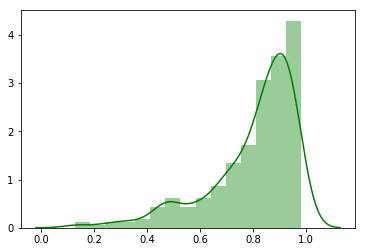

In [34]:
import seaborn as sns
sns.distplot(P_1_2, color="green")
filename = folderFig+'/P12.png'
plt.savefig(filename)


In [ ]:
# P_1_2.plot()
# plt.show()
# plt.hist(P_1_2, 50, normed=1, facecolor='green', alpha=0.5);


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


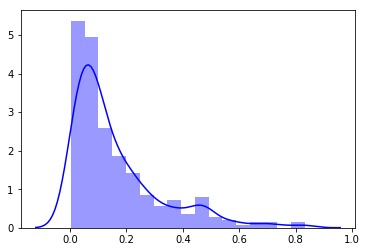

In [35]:
# plt.hist(P_2_2, 50, normed=1, facecolor='blue', alpha=0.5)
sns.distplot(P_2_2, color="blue")
filename = folderFig+'/P22.png'
plt.savefig(filename)


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


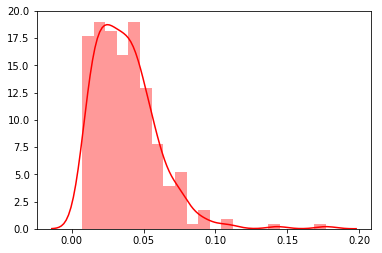

In [36]:
# plt.hist(P_6_2, 50, normed=1, facecolor='red', alpha=0.5)
sns.distplot(P_6_2, color="red")
filename = folderFig+'/P62.png'
plt.savefig(filename)


In [ ]:
print( PredY1eNo2,PredY2eNo2, PredY3eNo2, PredY4eNo2, PredY5eNo2, PredY6eNo2)

In [ ]:
# multiplisere matrisene - som gir oss en liste med predikerte verdier (nx1 matrise)
PredY2eNo2[0:9,] # 10 første orgnr og predikert verdi
SumY1No2 = math.exp(PredY1eNo2)

In [ ]:
# Calculate probability for most popular hurdle rate



# probY3No3 = SumY3No3/(SumY1No3 + SumY2No3 + SumY3No3 + SumY4No3 + SumY5No3 + SumY6No3)

# probY4No3 = SumY4No3/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY5No3 = SumY5No3/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY6No3 = SumY6No3/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# print(probY1, probY2, probY3, probY4, probY5, probY6)
print("Sannsynligheten for at en bedrift velger metode 1 er: " + str(probY1No2)+ " og "+
     "sannsynligheten for at en bedrift velger metode 2 er: " + str(probY2No2) )



In [ ]:
PredY1eNo3 = X_3@beta_1_3
SumY1eNo3 = sum(-PredY1eNo3)
SumY1No3 = math.exp(SumY1eNo3)

PredY2eNo3 = X_3@beta_2_3
SumY2eNo3 = sum(-PredY2eNo3)
SumY2No3 = math.exp(SumY2eNo3)

# PredY3eNo3 = X_3@beta_3_3
# SumY3eNo3 = sum(PredY3eNo3)
# SumY3No3 = math.exp(SumY3eNo3)


# PredY4eNo3 = X_4@beta_4_3
# SumY4eNo3 = sum(PredY4eNo3)
# SumY4No3 = math.exp(SumY4eNo3)

# PredY5eNo3 = X_5@beta_5_3
# SumY5eNo3 = sum(PredY5eNo3)
# SumY5No3 = math.exp(SumY5eNo3)

# PredY6eNo3 = X_6@beta_6_3
# SumY6eNo3 = sum(PredY6eNo3)
# SumY6No3 = math.exp(SumY6eNo3)
# print(SumY1No3, SumY2No3, SumY3No3, SumY4No3, SumY5No3, SumY6No3)
print(SumY1No3, SumY2No3)


In [ ]:
# Calculate probability for most popular hurdle rate


probY1No3 = SumY1No3/(SumY1No3 + SumY2No3 )# + SumY3 + SumY4 + SumY5 + SumY6)

probY2No3 = SumY2No3/(SumY1No3 + SumY2No3 ) # + SumY3 + SumY4 + SumY5 + SumY6)

# PredY3= X@beta_3
# SumY3 = sum(PredY3)
# probY3 = SumY3/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY4 = SumY4/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY5 = SumY5/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY6 = SumY6/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# print(probY1, probY2, probY3, probY4, probY5, probY6)
print("Sannsynligheten for at en bedrift velger metode 1 er: " + str(probY1No3)+ " og "+
     "sannsynligheten for at en bedrift velger metode 2 er: " + str(probY2No3) )



In [ ]:
# print(probY1, probY2, probY3, probY4, probY5, probY6)
print("Sannsynligheten for at en bedrift velger metode 1 er: " + str(probY1)+ " og "+
     "sannsynligheten for at en bedrift velger metode 2 er: " + str(probY2) )


In [ ]:
# Covariatene i en X matrise (n x 4) og Koeffisientene til metode 1 i beta_1 (liste (4x1 matrise))
X_2, beta_1_3

In [ ]:
PredY1e = X_2@beta_1 # multiplisere matrisene - som gir oss en liste med predikerte verdier (nx1 matrise)
PredY1e[0:9,] # 10 første orgnr og predikert verdi

In [ ]:
math.exp(-0.01)

In [ ]:
SumY1e = sum(PredY1e) # tar summen av listen
print("Summen av alle elementene i listen: " + str(SumY1e))

In [ ]:
SumY1 = math.exp(SumY1e) # anvender eksponential funksjonen på summen:
print("Summen av alle predikerte verdier for metode1: " + str(SumY1))

In [ ]:
SumY3 = 0
SumY4 = 0
SumY5 = 0
SumY6 = 0
probY1 = SumY1/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)
print("Sannsynligheten for at en bedrift velger metode 1 er: " + str(probY1))

In [ ]:
PredY2e = X@beta_2 
SumY2e = sum(PredY2e)
SumY2 = math.exp(SumY2e)
print(SumY2e, SumY2 )

In [ ]:
print(len(PredY2e))
math.exp(SumY2e/len(PredY2e))


In [ ]:
PredY1e = X@beta_1
SumY1e = sum(-PredY1e)
SumY1 = math.exp(SumY1e)

PredY2e = X@beta_2
SumY2e = sum(-PredY2e)
SumY2 = math.exp(SumY2e)

# PredY3e = X@beta_3
# SumY3e = sum(PredY3e)
# SumY3 = math.exp(SumY3e)


# PredY4e = X@beta_4
# SumY4e = sum(PredY4e)
# SumY4 = math.exp(SumY4e)

# PredY5e = X@beta_5
# SumY5e = sum(PredY5e)
# SumY5 = math.exp(SumY5e)

# PredY6e = X@beta_6
# SumY6e = sum(PredY6e)
# SumY6 = math.exp(SumY6e)
# print(SumY1, SumY2, SumY3, SumY4, SumY5, SumY6)
print(SumY1, SumY2)


In [ ]:
# liste = ['1','2','3']
# for i in liste:
# PredY1 = X@beta_1
# SumY1 = sum(PredY1)
probY1 = SumY1/(SumY1 + SumY2 )# + SumY3 + SumY4 + SumY5 + SumY6)

# PredY2 = X@beta_2
# SumY2 = sum(PredY2)
probY2 = SumY2/(SumY1 + SumY2 )# + SumY3 + SumY4 + SumY5 + SumY6)

# PredY3= X@beta_3
# SumY3 = sum(PredY3)
# probY3 = SumY3/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY4 = SumY4/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY5 = SumY5/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)

# probY6 = SumY6/(SumY1 + SumY2 + SumY3 + SumY4 + SumY5 + SumY6)



In [ ]:
dff = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
s = pd.Series([1, 1, 2, 1])
dff.dot(s)

In [ ]:
dff

In [ ]:
s

In [ ]:
X

In [ ]:
beta1




In [ ]:
# import hashlib

# def encrypt_string(hash_string):
#     sha_signature = \
#         hashlib.sha256(hash_string.encode()).hexdigest()
#     return sha_signature
# hash_string = 'confidential data'
# sha_signature = encrypt_string(hash_string)
# print(sha_signature)
# # 3fef7ff0fc1660c6bd319b3a8109fcb9f81985eabcbbf8958869ef03d605a9eb